#### Timeline : Takes approximately 4 days for the complete list of Brands

URL : https://e-katalog.lkpp.go.id/productsearchcontroller/listproduk?authenticityToken=e62e1[…]a165930d&commodityId=329&order=relevance&limit=12&offset=1

Chrome : Version Version 109.0.5414.120 (Official Build) (64-bit)

ChromeDriver : download accordingly

In [3]:
#import warnings
#warnings.filterwarnings('ignore')
#headers = {"Accept-Language" : "en-US,en;q=0.5"}

In [2]:
#headers = {"Accept-Language" : "en-US,en;q=0.5"}

In [28]:
#Note : If a URL has mixed languages , then it will not detect the language automatically.

In [4]:
#!pip install googletrans == 4.0.0-rc1

In [4]:
#from googletrans import Translator
#import googletrans
#translator = Translator()

In [3]:
#Store website in a variable
#website = "https://e-katalog.lkpp.go.id/productsearchcontroller/listproduk?authenticityToken=e62e1[…]a165930d&commodityId=329&order=relevance&limit=12&offset=1"

In [2]:
#headers = {"Accept-Language": "en-US,en;q=0.5"}
#response = requests.get(website, headers=headers)

In [1]:
#Check the status code
#response.status_code

In [5]:
#import ssl
#ssl._create_default_https_context = ssl._create_unverified_context

#### MAIN WEB SCRAPING FOR INDONESIA - e-KATALOG

In [1]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import time
from selenium.webdriver.support.select import Select
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.options import Options
from random import randint
import urllib.parse
import warnings
warnings.filterwarnings('ignore')
headers = {"Accept-Language" : "en-US,en;q=0.5"}
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
from selenium.common.exceptions import NoSuchElementException, ElementNotVisibleException
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import time
from requests_html import HTMLSession,AsyncHTMLSession

In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

#### Extracting the list of Brands

In [58]:
#This list will be passed to the Main Web scraping code

In [64]:
website1 = 'https://e-katalog.lkpp.go.id/productsearchcontroller/listproduk?authenticityToken=e62e1[%E2%80%A6]a165930d&commodityId=329&order=relevance&limit=12&offset=1#'

chrome_options = Options()
chrome_options.add_argument("--lang=en");
chrome_options.add_experimental_option('excludeSwitches', ['enable-logging'])
prefs = {
        "translate_whitelists": {'id':'en'},
       "translate":{"enabled":"True"}}
chrome_options.add_experimental_option("prefs", prefs)
driver = webdriver.Chrome('C:\webdrivers\chromedriver.exe',options=chrome_options)
time.sleep(10)
driver.get(website1)
time.sleep(10)

In [65]:
listnew = driver.find_elements(By.XPATH, "//div[@class = 'form-group']/select[@name='mid']/option")

In [66]:
len(listnew)

4592

In [67]:
listnew[0].text

'choose all'

In [68]:
Brandlist_AllBrands = []

for i in listnew:
    #print(i.text)
    Brandlist_AllBrands.append(i.text)

In [69]:
len(Brandlist_AllBrands)

4592

In [70]:
Brandlist_AllBrands = list(filter(None, Brandlist_AllBrands))

In [71]:
len(Brandlist_AllBrands)

2296

In [72]:
# #Saving Brand names to excel
df = pd.DataFrame(Brandlist_AllBrands)
df.rename(columns = {0 : 'Brands'} , inplace = True)
df.head(2)

,Brands
0,choose all
1,3A


In [73]:
df.to_excel("Brandlist_AllBrands.xlsx" , index = False)

In [74]:
#Export and bring back the modified File
#Choose ALL , A CLASS and 'A+ CheQ COVID-19 High-Speed RT-qPCR Detection Kits' removed from the list
#Download and Clean the list at the backend 

In [5]:
#Read back the cleaned list
Brandlist = pd.read_excel('Brandlist_AllBrands.xlsx')

In [5]:
Brandlist.head(6)

,Brands
0,3A
1,3B Scientific
2,3IMED
3,3M
4,3RAY
5,77 Electronics


In [4]:
#store as List
Brandlist1 = list(Brandlist['Brands'])

In [5]:
Brandlist1

['3A',
 '3B Scientific',
 '3IMED',
 '3M',
 '3RAY',
 '77 Electronics',
 '99 TECHNOLOGIES Disinfectants',
 'A Class',
 'A&D',
 'A+ CheQ COVID-19 High-Speed RT-qPCR Detection Kits',
 'A-dec',
 'ABL-PPM',
 'ABN',
 'ABP med',
 'ABRAMED',
 'ABSORBACK',
 'ACARE',
 'ACARE, Taiwan',
 'ACCRIVA',
 'ACCU TELL',
 'ACCUGENCE',
 'ACCUMAX',
 'ACE MEDICAL',
 'ACF',
 'ACIER',
 'ACON',
 'ACROSS',
 'ACROSS CTO',
 'ACROSS CTO ST RX',
 'ACROSS HP',
 'ACRYSOF',
 'ACTIVA PC',
 'ACUTRONIC',
 'ADC-USA',
 'ADDARE',
 'ADVANCED',
 'ADVANTIME',
 'AE ATAKA',
 'AEON Technology',
 'AEROGEN',
 'AERTI',
 'AESCULAP',
 'AFA',
 'AGAPPE',
 'AGFA',
 'AGFA HEALTHCARE',
 'AGILON',
 'AGOMED',
 'AGS',
 'AGS MEDTECH',
 'AHA',
 'AIKANG',
 'AIMTB',
 'AIR SUPPORT',
 'AIRINSPACE',
 'AIRTECH',
 'AJC',
 'AKARSA APD',
 'AKTIF X-RAY',
 'ALCHIMIA',
 'ALCON',
 'ALIFAX SRL',
 'ALKACIDE',
 'ALKAZYME',
 'ALL-TEST',
 'ALOCLAIR',
 'ALPHA BAG',
 'ALPHALOOP',
 'ALTAMED',
 'ALTERA',
 'ALVO',
 'AMA',
 'AMBUMAX',
 'AMERITEK',
 'AMI',
 'AMICO',
 'AMO

In [6]:
#Index the list and pass it to the main scraping code 
Brand_test = Brandlist1[0 : 20]

In [9]:
Brand_test

['3A',
 '3B Scientific',
 '3IMED',
 '3M',
 '3RAY',
 '77 Electronics',
 '99 TECHNOLOGIES Disinfectants',
 'A Class',
 'A&D',
 'A+ CheQ COVID-19 High-Speed RT-qPCR Detection Kits',
 'A-dec',
 'ABL-PPM',
 'ABN',
 'ABP med',
 'ABRAMED',
 'ABSORBACK',
 'ACARE',
 'ACARE, Taiwan',
 'ACCRIVA',
 'ACCU TELL']

#### Checking if the website is accessible :

In [11]:
url= 'https://e-katalog.lkpp.go.id/productsearchcontroller/listproduk?q=MEDTRONIC&commodityId=329&order=relevance&limit=12&offset=1'

In [12]:
page = requests.get(url)

In [13]:
page

<Response [200]>

In [14]:
base_url = "https://e-katalog.lkpp.go.id/"

In [231]:
session = AsyncHTMLSession()
resp = await session.get(url)
await resp.html.arender(timeout=100, sleep=15)
soup = BeautifulSoup(resp.html.raw_html, 'html.parser')

In [150]:
#prod_list = soup.find_all('div', {'class' : 'card-item-image'})

In [151]:
#len(prod_list)

#### Getting the Product URLs

In [232]:
URL_list = []
for link in soup.find_all('div', {'class' : 'card-item-image'}):
    #URL_list.append(link.get('href'))
    temp_link = link.find('a').get('href')
    prod_url = base_url + temp_link
    #print(prod_url)
    URL_list.append(prod_url)

In [233]:
URL_list

['https://e-katalog.lkpp.go.id//katalog/produk/detail/1477893?lang=id&type=general',
 'https://e-katalog.lkpp.go.id//katalog/produk/detail/1477900?lang=id&type=general',
 'https://e-katalog.lkpp.go.id//katalog/produk/detail/1477798?lang=id&type=general',
 'https://e-katalog.lkpp.go.id//katalog/produk/detail/1477826?lang=id&type=general',
 'https://e-katalog.lkpp.go.id//katalog/produk/detail/1477855?lang=id&type=general',
 'https://e-katalog.lkpp.go.id//katalog/produk/detail/1477914?lang=id&type=general',
 'https://e-katalog.lkpp.go.id//katalog/produk/detail/1477926?lang=id&type=general',
 'https://e-katalog.lkpp.go.id//katalog/produk/detail/1477935?lang=id&type=general',
 'https://e-katalog.lkpp.go.id//katalog/produk/detail/1478168?lang=id&type=general',
 'https://e-katalog.lkpp.go.id//katalog/produk/detail/1478180?lang=id&type=general',
 'https://e-katalog.lkpp.go.id//katalog/produk/detail/1478710?lang=id&type=general',
 'https://e-katalog.lkpp.go.id//katalog/produk/detail/1478732?lan

#### Getting the Number of Pages : for Pagination
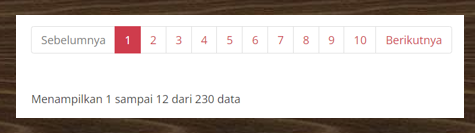

In [234]:
num_pages = soup.find('div',{'class' : 'col-sm-3 col-xs-12 col-md-4'}).text.split()[-2]

In [235]:
int(num_pages) - 1

229

This is the Number of time the next button would be Clicked or Next button URL will be grabbed

In [205]:
base_url2  = 'https://e-katalog.lkpp.go.id/productsearchcontroller/listproduk?'
NEXT_Page_half = soup.find('div',{'class' : 'col-sm-9 col-xs-12 col-md-8'}).find('ul').find_all('li')[-1].find('a').get('href')
base_url2 + NEXT_Page_half

'https://e-katalog.lkpp.go.id/productsearchcontroller/listproduk??q=MEDTRONIC&commodityId=329&order=relevance&limit=12&offset=2'

Structure of the webpage:
    - The default page limit to display the results is set as 12
    - There are two structures to tackle:
    - One : Brands with less than or equal to 12 Items , No Pagination
        - go into each URL , grab the details , Append to the Dataframe
    - Two : Brands with more than 12 items , with pagination. In this case , we need to calculate the number
        of pages so we can click on the "NEXT" button that many number of times.
        - We need to access the URL of the "NEXT" button that many number of times and scrape the products listed.

The Script :
    - Iterates through each Brand in the Brand_test list
    - For each Brand , access the URL
    - store the list of Product URLS >>> "product_urls_dedup"
    - access the Total number of products and calculate the number of pages > "num_pages"
    - And the Number of products : "num_pages_raw"
    - If (Number of Products listed) num_pages_raw is less than 12 then that means no pagination is required
    - Scrape only one page
    - ELSE
    - If (Number of Products listed) num_pages_raw is more than 12 then that means pagination is required
    - We have already calulated the number of pages above and stored in "num_pages"
    - While loop will access the "NEXT" page URL those many number of times 
    - Repeat the same process as above
        - Get the list of Product URLS
        - go into each URL , grab the details , Append to the Dataframe

### Using Selenium

In [3]:
base_url = "https://e-katalog.lkpp.go.id/"

In [24]:
#Read back the cleaned list
Brandlist = pd.read_excel('Brandlist_AllBrands.xlsx')
#store as List
Brandlist1 = list(Brandlist['Brands'])

In [25]:
len(Brandlist1)

2289

In [30]:
#Brand_test = ['3M']

In [28]:
Brandlist1.index('Welch Allyn')

2211

In [29]:
#Index the list and pass it to the main scraping code 
Brand_test = Brandlist1[2211 : 2240]
Brand_test

['Welch Allyn',
 'Well Lead',
 'Wellion',
 'West Medica',
 'Weyer',
 'White Elephant',
 'Whiteley',
 'Willmann & Pein',
 'Winner',
 'Winzone',
 'Wisap',
 'Wisonic',
 'Wong Hang Medical',
 'Woodpecker',
 'XINHENGRUN',
 'XPER Technology',
 'YCHD',
 'YEASN',
 'YHLO',
 'YHMED',
 'YOUNG WON',
 'YU-SHOU',
 'YUFENG',
 'YUNG KANG',
 'YUSHI',
 'Yakos65',
 'Yaohabio',
 'Yasee',
 'Yazumi']

Follow this link , replace "brand" with the keyword and check if its a relevant brand
- 'https://e-katalog.lkpp.go.id/productsearchcontroller/listproduk?q='+ brandname +'&commodityId=329&order=relevance&limit=12&offset=1'

#### Removed the below  and the backend and re-imported the brandlist file
- 'X-TRAGENE'
- 'auto'
- 'i-Sens'
- 'Super'
- 'film'

In [30]:
df_catalog = pd.DataFrame(columns = ['Product' ,'Price', 'Company' , 'Brand' , 'Function'])

for brandname in Brand_test:
    try:
        print(brandname)
        website = 'https://e-katalog.lkpp.go.id/productsearchcontroller/listproduk?q='+ brandname +'&commodityId=329&order=relevance&limit=12&offset=1'
        print("Starting Scraping Brand : " , brandname)
        driver = webdriver.Chrome('C:\webdrivers\chromedriver.exe')
        time.sleep(2)
        driver.get(website)
        time.sleep(5)
        
        num_pages_raw = driver.find_element(By.CLASS_NAME , 'col-md-4').text.split()[-2]
        num_pages_raw =int(num_pages_raw)
        num_pages = round(num_pages_raw/12)
        print("Number of pages to be scraped :::: " , num_pages)
        
        if num_pages_raw > 12:
            for i in range(1 , num_pages+1):
                website = 'https://e-katalog.lkpp.go.id/productsearchcontroller/listproduk?q='+ brandname +'&commodityId=329&order=relevance&limit=12&offset='+str(i)
                driver.get(website)
                print('Page Number ::: ', i)
                time.sleep(5)
                url_joined = []
                base_url2  = 'https://e-katalog.lkpp.go.id/productsearchcontroller/listproduk'
                elems = driver.find_elements(By.XPATH, "//div[@class='card-item-image']/a")

                for elem in elems:
                    x = elem.get_attribute("href")
                    url_joined.append(x)

                for url2 in url_joined:   
                    print("Starting Scraping URL : " , url2)
                    driver.get(url2)
                    time.sleep(5)

                    try:
                        price = driver.find_element(By.ID, "detailhargaChange").text
                        #priceList.append(price)
                    except:
                        price = 'n/a'
                        #priceList.append('n/a')

                    items_list_soup= driver.find_elements(By.CLASS_NAME , "detail-item")
                    items_list = []
                    for i in items_list_soup:
                        items_list.append(i.text.strip())
                    for i in items_list:
                        if i.startswith('Nama Produk'):
                            item1 = 1
                            product = i.replace('Nama Produk\n', "")

                    if item1 == 1:
                        product = product
                    else:
                        product = 'n/a'

                    for i in items_list:
                        if i.startswith('Fungsi'):
                            item2 = 1
                            function = i.replace('Fungsi\n', "")

                    if item2 == 1:
                        function = function
                    else:
                        function = 'n/a'

                    for i in items_list:
                        if i.startswith('Nama Perusahaan'):
                            item3 = 1
                            company = i.split('\n')[1]

                    if item3 == 1:
                        company = company
                    else:
                        company = 'n/a'

                    for i in items_list:
                        if i.startswith('Merek'):
                            item4 = 1
                            brand = i.replace('Merek\n', "")

                    if item4 == 1:
                        brand = brand
                    else:
                        brand = 'n/a'
                    df_catalog=df_catalog.append({'Product' : product ,'Price' : price, 'Company' : company , 'Brand' : brand , 'Function' : function },ignore_index=True)
            
        else:
            driver.get(website)
            #print('im here')
            time.sleep(5)
            url_joined = []
            base_url2  = 'https://e-katalog.lkpp.go.id/productsearchcontroller/listproduk'
            elems = driver.find_elements(By.XPATH, "//div[@class='card-item-image']/a")

            for elem in elems:
                x = elem.get_attribute("href")
                url_joined.append(x)

            for url2 in url_joined:   
                print("Starting Scraping URL : " , url2)
                driver.get(url2)
                time.sleep(3)

                try:
                    price = driver.find_element(By.ID, "detailhargaChange").text
                    #priceList.append(price)
                except:
                    price = 'n/a'
                    #priceList.append('n/a')

                items_list_soup= driver.find_elements(By.CLASS_NAME , "detail-item")
                items_list = []
                for i in items_list_soup:
                    items_list.append(i.text.strip())
                for i in items_list:
                    if i.startswith('Nama Produk'):
                        item1 = 1
                        product = i.replace('Nama Produk\n', "")

                if item1 == 1:
                    product = product
                else:
                    product = 'n/a'

                for i in items_list:
                    if i.startswith('Fungsi'):
                        item2 =  1
                        function = i.replace('Fungsi\n', "")

                if item2 == 1:
                    function = function
                else:
                    function = 'n/a'

                for i in items_list:
                    if i.startswith('Nama Perusahaan'):
                        item3 = 1
                        company = i.split('\n')[1]

                if item3 == 1:
                    company = company
                else:
                    company = 'n/a'

                for i in items_list:
                    if i.startswith('Merek'):
                        item4 = 1
                        brand = i.replace('Merek\n', "")

                if item4 == 1:
                    brand = brand
                else:
                    brand = 'n/a'
                    
                df_catalog=df_catalog.append({'Product' : product ,'Price' : price, 'Company' : company , 'Brand' : brand , 'Function' : function },ignore_index=True)
        
    except:
        pass

Welch Allyn
Starting Scraping Brand :  Welch Allyn
Number of pages to be scraped ::::  0
Starting Scraping URL :  https://e-katalog.lkpp.go.id/katalog/produk/detail/1453286?lang=id&type=general
Starting Scraping URL :  https://e-katalog.lkpp.go.id/katalog/produk/detail/1388943?lang=id&type=general
Starting Scraping URL :  https://e-katalog.lkpp.go.id/katalog/produk/detail/1391272?lang=id&type=general
Starting Scraping URL :  https://e-katalog.lkpp.go.id/katalog/produk/detail/1391307?lang=id&type=general
Starting Scraping URL :  https://e-katalog.lkpp.go.id/katalog/produk/detail/1391370?lang=id&type=general
Well Lead
Starting Scraping Brand :  Well Lead
Number of pages to be scraped ::::  1
Page Number :::  1
Starting Scraping URL :  https://e-katalog.lkpp.go.id/katalog/produk/detail/1418660?lang=id&type=general
Starting Scraping URL :  https://e-katalog.lkpp.go.id/katalog/produk/detail/1421855?lang=id&type=general
Starting Scraping URL :  https://e-katalog.lkpp.go.id/katalog/produk/det

In [21]:
df_catalog.shape

(5472, 5)

In [56]:
df_catalog

,Product,Price,Company,Brand,Function
0,Operating Lamp IG-100DC,n/a,PT. MANDIRI JAYA MEDIKA,ORDISI,Lampu penerangan saat Operasi
1,CURAS,"Rp 722.323.700,00",PT. ZHENGAN INDONESIA,ILOODA,"For the treatment of tattoo removal, pigmented..."
2,FRAXIS,"Rp 448.443.500,00",PT. ZHENGAN INDONESIA,ILOODA,"For the treatment of tone & texture, pore redu..."
3,FRAXIS DUO,"Rp 679.228.900,00",PT. ZHENGAN INDONESIA,ILOODA,"For the treatment of tone & texture, pore redu..."
4,IMEDICOM SPINAUT-H - H1000,"Rp 9.245.000,00",PT. MITRA FAJAR SELARAS,IMEDICOM,Catheter untuk tindakan epidural Neurolisis de...
...,...,...,...,...,...
9642,Optimum Surgical Mask Ear Loop.,"Rp 45.000,00",PT. GLOBAL DISPOMEDIKA,OPTIMUM,Surgical mask (Masker Bedah) 3 Ply (tiga lapis...
9643,Optimum Surgical Mask Tie On.,"Rp 45.000,00",PT. GLOBAL DISPOMEDIKA,OPTIMUM,Surgical mask (Masker Bedah) 3 Ply (tiga lapis...
9644,Optimum Protective Cover All Seam Taped.,"Rp 170.000,00",PT. GLOBAL DISPOMEDIKA,OPTIMUM,Optimum Protective Cover All Seam Taped berfun...
9645,OPTIMUM Protective Cover All Non Seam Taped.,"Rp 150.000,00",PT. GLOBAL DISPOMEDIKA,OPTIMUM,Optimum Protective Cover All Non Seam Taped be...


In [31]:
df_catalog.to_excel('df_catalog.xlsx' , index = False)

In [32]:
driver.quit()

- Analyst : Aisha Khalid
- Email : aisha.khalid@clearstate.com